# **Class Imbalance on the Credit Card Fraud Detection Dataset**

Class imbalance is a major challenge in machine learning, especially in tasks like fraud detection, where the minority class (fraudulent transactions) is vastly outnumbered by the majority class (legitimate transactions). This imbalance often leads to poor performance in identifying the minority class. In this notebook, I analyze the impact of class imbalance using the Credit Card Fraud Detection Dataset. 

I evaluate three classification models—Logistic Regression, Random Forest, and XGBoost—first without any adjustments, and then with techniques like class weighting, SMOTE, undersampling, and a combination of SMOTE with ENN. By comparing precision, recall, and their trade-offs, I aim to identify the most effective strategies for handling class imbalance and improving detection of fraudulent transactions.

### **Imports**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN


### **Load and Pre Process the dataset**

In [6]:
df_credit = pd.read_csv("creditcard.csv")

In [7]:
df_credit

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [8]:
print("Shape of the dataset (rows, columns):", df_credit.shape) # Displaying the shape of the dataset

Shape of the dataset (rows, columns): (284807, 31)


The dataset contains **284,807 rows** and **31 columns**. It presents transactions that occurred in two days, where we have **492 frauds** out of **284,807 transactions**. 

In [9]:
df_credit.describe() # Displaying the summary statistics of the dataset

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

The dataset consists of 284,807 records and 31 columns, with features primarily derived using Principal Component Analysis (PCA). The Time column captures the elapsed time since the first transaction, ranging from 0 to 172,792 seconds, with a mean of 94,814 seconds.

The PCA-transformed features (V1–V28) exhibit a mean close to zero and varying standard deviations, reflecting their normalization. The Amount column, representing transaction values, has a mean of 88.35 and a maximum of 25,691.16, indicating a highly skewed distribution. The target variable, Class, is binary, with a mean of 0.0017, highlighting the dataset's significant class imbalance.

In [10]:
# Checking for missing values
print("Missing values per column:")
display(df_credit.isnull().sum())

Missing values per column:


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
print("Number of duplicate rows:", df_credit.duplicated().sum()) # Checking for duplicate rows

Number of duplicate rows: 1081


There are **no missing values**, but there are **1081 duplicate rows**. The existance of duplicated rows is not problematic, once there could be two equal transactions.

In [12]:
# Checking for the data types of each column
print("Data types of each column:")
display(df_credit.dtypes)

Data types of each column:


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

The features are all float64 besides the class column, which is int64

In [13]:
df_credit['Class'].value_counts() # Checking the distribution of the target variable

Class
0    284315
1       492
Name: count, dtype: int64

The dataset is highly imbalanced, with 284,315 records labeled as class `0` (non-fraudulent) and only 492 labeled as class `1` (fraudulent). This imbalance emphasizes the need for specialized techniques to effectively handle and analyze the minority class.

### **Data Visualization**

##### **Class Distribution**

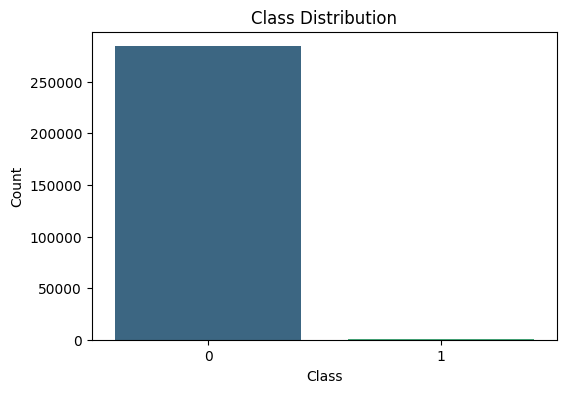

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_credit, x='Class', hue='Class', dodge=False, palette="viridis")
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend([], [], frameon=False) 
plt.show()

The dataset is highly imbalanced, with an overwhelming majority of transactions being non-fraudulent. The count of non-fraudulent transactions (class 0) is in the range of hundreds of thousands, while fraudulent transactions (class 1) are nearly negligible in comparison, barely visible on the chart. This imbalance is typical for fraud detection datasets, as fraudulent activities represent a small fraction of all transactions. While this imbalance reflects real-world scenarios, it poses challenges for machine learning models, which may struggle to accurately identify the minority class.

##### **Time Distribution**

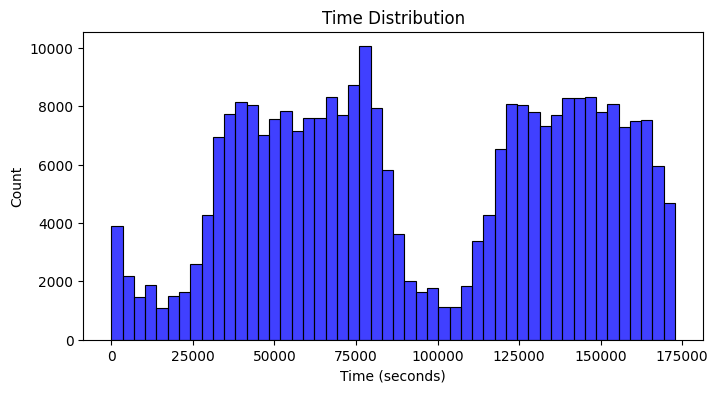

In [21]:
plt.figure(figsize=(8,4))
sns.histplot(df_credit['Time'], bins=50, kde=False, color='blue')
plt.title('Time Distribution')
plt.xlabel('Time (seconds)')
plt.ylabel('Count')
plt.show()

The x-axis represents the elapsed time in seconds since the first transaction in the dataset, while the y-axis shows the count of transactions within each time interval. The histogram reveals a bimodal pattern, with two prominent peaks around the 75,000-second and 150,000-second marks. This suggests variations in transaction activity at different times, potentially correlating with daily or hourly cycles of user behavior.

##### **Amount Distribution**

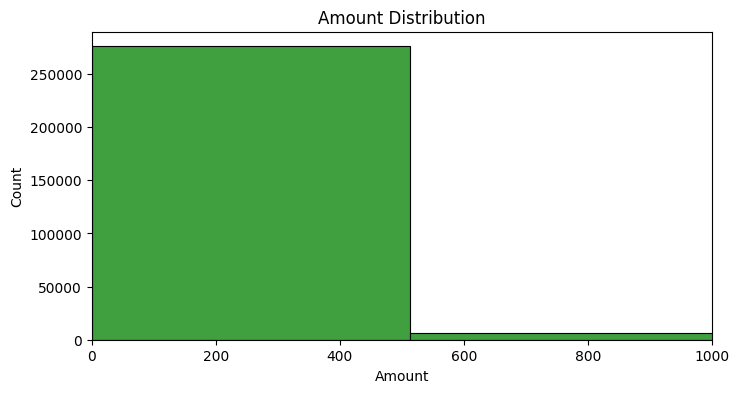

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df_credit['Amount'], bins=50, kde=False, color='green')
plt.title('Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.xlim([0, 1000]) 
plt.show()

The graph reveals a highly skewed distribution, where the majority of transactions fall within a lower range of values, while a significantly smaller number of transactions involve larger amounts. This disparity suggests that high-value transactions are rare, which is a common characteristic in datasets such as credit card transactions. This imbalance may have implications for fraud detection models, as fraudulent activities often involve atypical or extreme values, and the rarity of such occurrences could challenge the model's ability to generalize effectively without proper preprocessing or techniques to address this skewness.

##### **Correlation Heatmap**

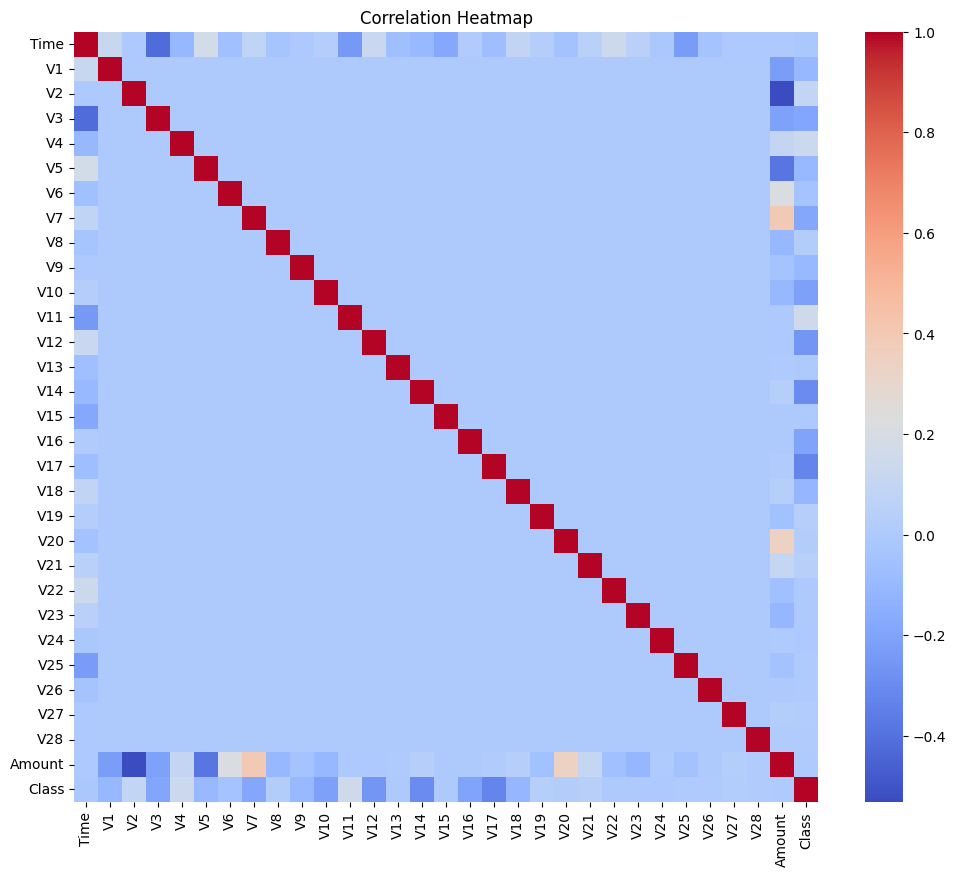

In [26]:
plt.figure(figsize=(12,10))
correlation = df_credit.corr()
sns.heatmap(correlation, cmap="coolwarm", annot=False, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

Most of the features (V1 to V28) exhibit weak correlations with each other and with the target variable, as indicated by the predominantly light blue coloration. This suggests that these features are largely independent, which aligns with the fact that they result from a dimensionality reduction technique like PCA. Interestingly, a few features, such as "Amount" and others close to "Class," show slightly stronger correlations with the target variable, though still not very pronounced.

##### **PCA Component Dsitribution (V1-V28)**

In [ ]:
plt.figure(figsize=(16,12))
for i, col in enumerate(df_credit.columns[1:29], 1):  
    plt.subplot(7, 4, i)
    sns.histplot(df_credit[col], bins=50, kde=True, color='orange')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Most of these features appear to follow approximately Gaussian or normal-like distributions, with their values concentrated around a central peak and tapering off symmetrically. Some features, such as V1, V2, V3, and V23, have distributions that exhibit long tails or skewness, indicating potential outliers or asymmetrical data. Features like V27 and V28 show extremely sharp peaks, suggesting that most data points are clustered closely around a narrow range of values. These distributions are the result of PCA transformations applied to anonymize the data, which compresses the original feature relationships into orthogonal components. The overall shape of these distributions highlights the variability across different features.

##### **Amount By Class**

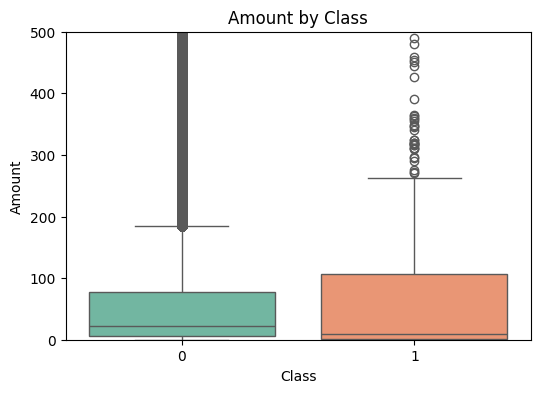

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_credit, x='Class', y='Amount', hue='Class', dodge=False, palette="Set2")
plt.title('Amount by Class')
plt.ylim([0, 500]) 
plt.xlabel('Class')
plt.ylabel('Amount')
plt.legend([], [], frameon=False) 
plt.show()

For non-fraudulent transactions (Class 0), the distribution shows a median transaction amount close to zero and a relatively small interquartile range (IQR), but with the presence of significant outliers extending up to 500. In contrast, fraudulent transactions (Class 1) exhibit a higher median amount and a larger IQR, indicating more variability in transaction amounts for this class. The presence of numerous outliers in Class 1 suggests that fraudulent transactions often involve unusually high amounts, reinforcing the importance of amount as a distinguishing feature in fraud detection. However, the overlap and variability between the two classes imply that transaction amount alone cannot reliably separate fraud from non-fraud and must be used in conjunction with other features.

### **Performance Metrics and Classification Algorithms**

**Precision** is a metric that measures the accuracy of the fraud predictions made by the model. Specifically, it calculates the proportion of positive predictions (fraudulent transactions) that are actually correct. In other words, precision tells us how many of the transactions flagged as fraudulent were truly fraudulent. The goal is to maximize precision to minimize false positives—i.e., legitimate transactions that are incorrectly identified as fraud. High precision ensures that when the model detects fraud, it is making correct predictions, which is crucial for preventing unnecessary disruptions to customers. For example, in a credit card fraud detection system, minimizing false alarms is important to avoid frustrating users with declined legitimate transactions.

**Recall**, on the other hand, measures the ability of the model to correctly identify all fraudulent transactions, capturing the true positives while avoiding false negatives (fraudulent transactions that go undetected). The goal is to maximize recall to minimize the risk of missing fraudulent transactions, as failing to detect fraud can result in significant financial losses and reputational damage. In a high-stakes domain like credit card fraud detection, it's often more important to err on the side of caution and detect as many fraudulent transactions as possible, even if that means accepting a higher rate of false positives. By prioritizing recall, a model can ensure that most fraud is caught, reducing the impact of undetected fraudulent activity.

For this problem, three classification models were selected based on their ability to handle imbalanced datasets and their performance in binary classification tasks. **Logistic regression** serves as a strong baseline, offering simplicity and interpretability, with the advantage of class weight adjustments to better capture the minority fraud class. **Random forests**, as an ensemble method, provide robustness and can effectively model complex relationships, with built-in capabilities to address class imbalance. Finally, **XGBoost**, a powerful gradient boosting technique, is known for its superior performance in handling imbalanced data, providing fine-tuned control over model parameters to optimize fraud detection. Together, these models offer a well-rounded approach, from simpler methods to more advanced techniques, enabling a comprehensive evaluation of fraud detection capabilities.

##### **Split the dataset**

In [ ]:
X = df_credit.drop(columns=['Class'])
y = df_credit['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### **Logistic Regression**

In [23]:
#Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.61      0.71       148

    accuracy                           1.00     85443
   macro avg       0.92      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Precision: 0.8504672897196262
Recall: 0.6148648648648649


##### **Random Forest**

In [25]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Precision: 0.9572649572649573
Recall: 0.7567567567567568


##### **XGBoost**

In [26]:
# XGBoost
gb = XGBClassifier(random_state=42)
gb.fit(X_train, y_train)

# Predictions
y_pred_gb = gb.predict(X_test)

# Evaluation
print("XGBoost:")
print(classification_report(y_test, y_pred_gb))
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)

XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.75      0.83       148

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Precision: 0.940677966101695
Recall: 0.75


### **Improvements**

#### **Class Weights**

##### **Logistic Regression with Class Weights**

In [ ]:
# Logistic Regression with updated parameters
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga', random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
print("Precision:", precision_log)
print("Recall:", recall_log)

c:\Users\catar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Precision: 0.06208213944603629
Recall: 0.8783783783783784


##### **Random Forest with Class Weights**

In [ ]:
# Random Forest with class weights
rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions 
y_pred_rf = rf_clf.predict(X_test)

# Evaluation
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.71      0.82       148

    accuracy                           1.00     85443
   macro avg       0.99      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Precision: 0.9722222222222222
Recall: 0.7094594594594594


##### **XGBoost with scale_pos_weight for Class Imbalance**


In [ ]:
# XGBoost with scale_pos_weight for class imbalance
ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
xgb_clf = XGBClassifier(scale_pos_weight=ratio, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluation
print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)

c:\Users\catar\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:58:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.79      0.83       148

    accuracy                           1.00     85443
   macro avg       0.94      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Precision: 0.8796992481203008
Recall: 0.7905405405405406


#### **Oversampling (SMOTE)**

##### **Split the Dataset**

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

Class distribution after SMOTE:
Class
0    199020
1    199020
Name: count, dtype: int64


##### **Logistic Regression with SMOTE**

In [34]:
# Logistic Regression with SMOTE
logreg_smote = LogisticRegression(random_state=42, max_iter=1000)
logreg_smote.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_smote = logreg_smote.predict(X_test)

# Evaluation
print("Logistic Regression with SMOTE")
print(classification_report(y_test, y_pred_smote))
precision_log_smote = precision_score(y_test, y_pred_smote )
recall_log_smote = recall_score(y_test, y_pred_smote )
print("Precision:", precision_log_smote)
print("Recall:", recall_log_smote)

Logistic Regression with SMOTE
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Precision: 0.06451612903225806
Recall: 0.8783783783783784


##### **Random Forest with SMOTE**

In [35]:
# Random Forest with SMOTE
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_rf_smote = rf_smote.predict(X_test)

# Evaluation
print("Random Forest with SMOTE")
print(classification_report(y_test, y_pred_rf_smote))
precision_rf_smote = precision_score(y_test, y_pred_rf_smote)
recall_rf_smote = recall_score(y_test, y_pred_rf_smote)
print("Precision:", precision_rf_smote)
print("Recall:", recall_rf_smote)

Random Forest with SMOTE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.78      0.83       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Precision: 0.8923076923076924
Recall: 0.7837837837837838


##### **XGBoost with SMOTE**

In [36]:
# XGBoost with SMOTE
xgb_smote = XGBClassifier(random_state=42)
xgb_smote.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_xgb_smote = xgb_smote.predict(X_test)

# Evaluation
print("XGBoost with SMOTE")
print(classification_report(y_test, y_pred_xgb_smote))
precision_xgb_smote = precision_score(y_test, y_pred_xgb_smote)
recall_xgb_smote = recall_score(y_test, y_pred_xgb_smote)
print("Precision:", precision_xgb_smote)
print("Recall:", recall_xgb_smote)

XGBoost with SMOTE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.72      0.82      0.77       148

    accuracy                           1.00     85443
   macro avg       0.86      0.91      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Precision: 0.7245508982035929
Recall: 0.8175675675675675


#### **Undersampling**

##### **Split the Dataset**

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print("Class distribution after undersampling:")
print(y_train_rus.value_counts())


Class distribution after undersampling:
Class
0    344
1    344
Name: count, dtype: int64


##### **Logistic Regression with Undersampling**

In [38]:
# Logistic Regression with Undersampling
logreg_rus = LogisticRegression(random_state=42, max_iter=1000)
logreg_rus.fit(X_train_rus, y_train_rus)

# Predictions
y_pred_rus = logreg_rus.predict(X_test)

# Evaluation
print("Logistic Regression with Undersampling")
print(classification_report(y_test, y_pred_rus))
precision_log_rus = precision_score(y_test, y_pred_rus)
recall_log_rus = recall_score(y_test, y_pred_rus)
print("Precision:", precision_log_rus)
print("Recall:", recall_log_rus)

Logistic Regression with Undersampling
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.89      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Precision: 0.06405867970660147
Recall: 0.8851351351351351


##### **Random Forest with Undersampling**

In [39]:
# Random Forest with Undersampling
rf_rus = RandomForestClassifier(random_state=42)
rf_rus.fit(X_train_rus, y_train_rus)

# Predictions
y_pred_rf_rus = rf_rus.predict(X_test)

# Evaluation
print("Random Forest with Undersampling")
print(classification_report(y_test, y_pred_rf_rus))
precision_rf_rus = precision_score(y_test, y_pred_rf_rus)
recall_rf_rus = recall_score(y_test, y_pred_rf_rus)
print("Precision:", precision_rf_rus)
print("Recall:", recall_rf_rus)

Random Forest with Undersampling
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.88      0.13       148

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Precision: 0.07311586051743532
Recall: 0.8783783783783784


##### **XGBoost with Undersampling**

In [40]:
# XGBoost with Undersampling
xgb_rus = XGBClassifier(random_state=42)
xgb_rus.fit(X_train_rus, y_train_rus)

# Predictions
y_pred_xgb_rus = xgb_rus.predict(X_test)

# Evaluation
print("XGBoost with Undersampling")
print(classification_report(y_test, y_pred_xgb_rus))
precision_xgb_rus = precision_score(y_test, y_pred_xgb_rus)
recall_xgb_rus = recall_score(y_test, y_pred_xgb_rus)
print("Precision:", precision_xgb_rus)
print("Recall:", recall_xgb_rus)

XGBoost with Undersampling
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85295
           1       0.04      0.91      0.08       148

    accuracy                           0.96     85443
   macro avg       0.52      0.93      0.53     85443
weighted avg       1.00      0.96      0.98     85443

Precision: 0.04200626959247649
Recall: 0.9054054054054054


#### **SMOTENN (SMOTE + ENN)**

##### **Split the Dataset**

In [ ]:
smote_enn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smote_enn.fit_resample(X_train, y_train)

print("Class distribution after SMOTEENN:")
print(y_train_smoteenn.value_counts())

Class distribution after SMOTEENN:
Class
1    199020
0    198682
Name: count, dtype: int64


##### **Logistic Regression with SMOTENN**

In [42]:
# Logistic Regression with SMOTE + ENN
logreg_smoteenn = LogisticRegression(random_state=42, max_iter=1000)
logreg_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

# Predictions
y_pred_smoteenn = logreg_smoteenn.predict(X_test)

# Evaluation
print("Logistic Regression with SMOTE + ENN")
print(classification_report(y_test, y_pred_smoteenn))
precision_log_smoteenn = precision_score(y_test, y_pred_smoteenn)
recall_log_smoteenn = recall_score(y_test, y_pred_smoteenn)
print("Precision:", precision_log_smoteenn)
print("Recall:", recall_log_smoteenn)

Logistic Regression with SMOTE + ENN
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Precision: 0.06172839506172839
Recall: 0.8783783783783784


##### **Random Forest with SMOTENN**

In [43]:
# Random Forest with SMOTE + ENN
rf_smoteenn = RandomForestClassifier(random_state=42)
rf_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

# Predictions
y_pred_rf_smoteenn = rf_smoteenn.predict(X_test)

# Evaluation
print("Random Forest with SMOTE + ENN")
print(classification_report(y_test, y_pred_rf_smoteenn))
precision_rf_smoteenn = precision_score(y_test, y_pred_rf_smoteenn)
recall_rf_smoteenn = recall_score(y_test, y_pred_rf_smoteenn)
print("Precision:", precision_rf_smoteenn)
print("Recall:", recall_rf_smoteenn)

Random Forest with SMOTE + ENN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.80      0.78      0.79       148

    accuracy                           1.00     85443
   macro avg       0.90      0.89      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Precision: 0.8
Recall: 0.7837837837837838


##### **XGBoost with SMOTENN**

In [44]:
# XGBoost with SMOTE + ENN
xgb_smoteenn = XGBClassifier(random_state=42)
xgb_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

# Predictions
y_pred_xgb_smoteenn = xgb_smoteenn.predict(X_test)

# Evaluation
print("XGBoost with SMOTE + ENN")
print(classification_report(y_test, y_pred_xgb_smoteenn))
precision_xgb_smoteenn = precision_score(y_test, y_pred_xgb_smoteenn)
recall_xgb_smoteenn = recall_score(y_test, y_pred_xgb_smoteenn)
print("Precision:", precision_xgb_smoteenn)
print("Recall:", recall_xgb_smoteenn)

XGBoost with SMOTE + ENN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.65      0.80      0.72       148

    accuracy                           1.00     85443
   macro avg       0.82      0.90      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Precision: 0.6502732240437158
Recall: 0.8040540540540541


### **Comparison of the Models**

In [ ]:
# Models dictionary
models = {
    'Logistic Regression (Base)': lr,
    'Random Forest (Base)': rf,
    'XGBoost (Base)': gb,
    'Logistic Regression (Class Weight)': log_reg,
    'Random Forest (Class Weight)': rf_clf,
    'XGBoost (Class Weight)': xgb_clf,
    'Logistic Regression (SMOTE)': logreg_smote,
    'Random Forest (SMOTE)': rf_smote,
    'XGBoost (SMOTE)': xgb_smote,
    'Logistic Regression (Undersampling)': logreg_rus,
    'Random Forest (Undersampling)': rf_rus,
    'XGBoost (Undersampling)': xgb_rus,
    'Logistic Regression (SMOTE + ENN)': logreg_smoteenn,
    'Random Forest (SMOTE + ENN)': rf_smoteenn,
    'XGBoost (SMOTE + ENN)': xgb_smoteenn
}

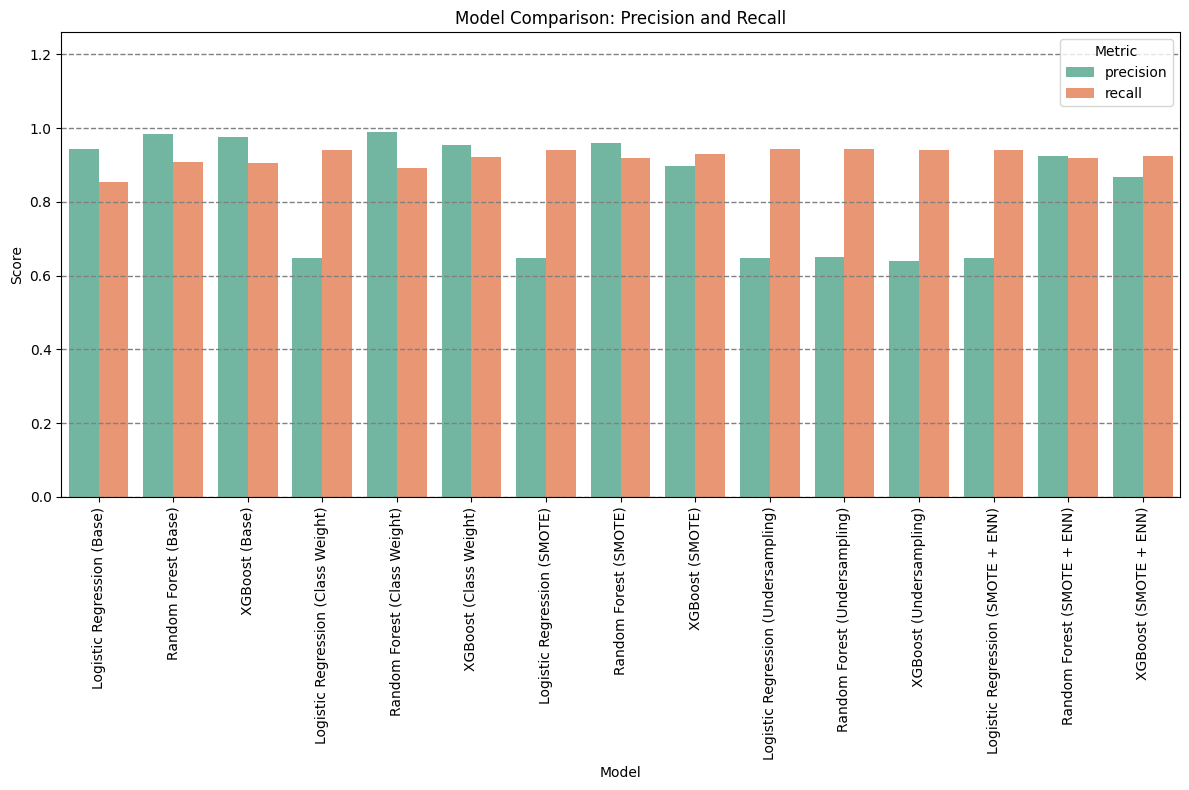

In [ ]:

# Function to plot comparison
def plot_comparison(models, X_test, y_test):
    results = []
    
    for name, model in models.items():
        y_pred = model.predict(X_test) 
        report = classification_report(y_test, y_pred, output_dict=True) 
        
        for label in ['0', '1', 'macro avg', 'weighted avg']:
            results.append({
                'Model': name,
                'Metric': 'precision',
                'Score': report[label]['precision'],
                'Class': label
            })
            results.append({
                'Model': name,
                'Metric': 'recall',
                'Score': report[label]['recall'],
                'Class': label
            })
    
    results_df = pd.DataFrame(results)
    
    # Plot the comparison
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x='Model', y='Score', hue='Metric', data=results_df, palette="Set2", errorbar=None)
    y_ticks = ax.get_yticks() 
    for y_tick in y_ticks:
        ax.axhline(y=y_tick, color='gray', linestyle='--', linewidth=1)
    plt.xticks(rotation=90)
    plt.title('Model Comparison: Precision and Recall')
    plt.ylabel('Score')
    plt.xlabel('Model')
    plt.tight_layout()
    plt.show()

plot_comparison(models, X_test, y_test)


The baseline models demonstrate a high level of precision, especially for Logistic Regression and Random Forest, which indicates that these models are generally cautious and rarely predict fraud incorrectly. However, the recall values are very low, highlighting their inability to detect a significant proportion of actual fraud cases. This is a critical issue in fraud detection, where failing to identify fraudulent transactions (low recall) poses a greater risk than false alarms.

Introducing class-weighted models brings a moderate improvement in recall for all three algorithms, accompanied by a slight reduction in precision. By assigning higher penalties to misclassifications of the minority class (fraud), these models manage to detect more fraudulent transactions. However, the improvement in recall is not as pronounced as it is in strategies involving SMOTE, which suggests that while class weighting is a useful adjustment, it may not be sufficient on its own to address severe imbalances.

Models trained with SMOTE (Synthetic Minority Oversampling Technique) show significant improvements in recall for all three algorithms. This is particularly noticeable for Random Forest and XGBoost, which achieve a better balance between precision and recall. Although there is a slight reduction in precision, this trade-off is acceptable given the need to identify more fraud cases. SMOTE proves effective because it generates synthetic examples of the minority class, helping the models better differentiate between fraudulent and non-fraudulent transactions.

Undersampling, on the other hand, leads to improved recall compared to the baseline but at the cost of lower precision. This happens because undersampling reduces the size of the majority class, which limits the model’s exposure to non-fraudulent transactions and weakens its ability to correctly classify them. While this strategy enhances sensitivity to the minority class, it risks losing valuable information about the majority class, making it a less desirable approach in most cases.

The combination of SMOTE with Edited Nearest Neighbors (ENN) emerges as the most effective method for balancing precision and recall. This approach not only generates synthetic minority-class samples but also refines the data by removing noise and borderline examples from both classes. Random Forest and XGBoost benefit the most from this combination, achieving high recall while maintaining stable precision. This makes the SMOTE+ENN strategy particularly suitable for fraud detection, as it minimizes the likelihood of missing fraudulent transactions while keeping false alarms to a manageable level.

In summary, while baseline models and class-weighted adjustments provide some improvement, the SMOTE+ENN combination is the most effective strategy. It ensures high sensitivity to fraudulent transactions and avoids excessive false positives, striking an optimal balance for fraud detection systems. Among the models tested, Random Forest and XGBoost trained with SMOTE+ENN are recommended for their robustness and superior performance in handling imbalanced datasets.